In [5]:
import glob
import numpy as np

In [6]:
path_base="/home/francisco/datasets/datasets/sound/voice/stress"

In [7]:
def getLabel(s):
    if s=="TRUE":
        return 1.0
    if s=="FALSE":
        return 0.0
    if s=="PC":
        return 2.0
def isRightLabel(s):
    if s=="TRUE":
        return True
    if s=="FALSE":
        return True
    if s=="PC":
        return False
    return False

In [9]:
data=[]
labels=[]
file_txt=path_base+"/*.csv"
for filepath in glob.glob(file_txt):
    print("Processing file: {}".format(filepath)) 
    with open(filepath) as fp:  
        line = fp.readline()
        head_list=line.split(";")
        #for i,head in enumerate(head_list):
        #    print(i,head)
        cnt = 1
        line = fp.readline()
        while line:
            data_row=[]
            line_list=line.split(";")
            #print("Line {}: {} {} {}".format(cnt, line_list[0], line_list[1], line_list[2]))
            line = fp.readline()
            cnt += 1
            if not isRightLabel(line_list[0]):
                continue
            for i,datum in enumerate(line_list):
                #print(i,head_list[i],"=",datum)
                if i>1:
                    data_row.append(float(datum))
                if i==0:
                    labels.append(getLabel(datum))
            data.append(data_row)
data_np=np.array(data)
labels_np=np.array(labels)
print(data_np.shape)
print(data_np)
print(labels_np.shape)
print(labels_np)


Processing file: /home/francisco/datasets/datasets/sound/voice/stress/Set_Males.csv
Processing file: /home/francisco/datasets/datasets/sound/voice/stress/Set_Females.csv
(50, 68)
[[1.26278e+02 1.40000e-02 2.90000e-02 ... 1.56810e+01 8.70000e-01
  1.20000e-02]
 [1.42901e+02 5.00000e-03 1.90000e-02 ... 1.08340e+01 9.36000e-01
  8.00000e-03]
 [1.17189e+02 5.00000e-03 1.40000e-02 ... 1.17650e+01 9.67000e-01
  6.00000e-03]
 ...
 [1.92269e+02 8.00000e-03 2.20000e-02 ... 1.06000e+01 9.28000e-01
  7.00000e-03]
 [1.67700e+02 5.00000e-03 2.50000e-02 ... 9.56400e+00 9.33000e-01
  9.00000e-03]
 [2.06086e+02 7.00000e-03 1.30000e-02 ... 9.85100e+00 9.22000e-01
  4.60000e-02]]
(50,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [12]:
#FROM:
#   https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [27]:
X_full, y_full = data_np, labels_np

# Take only 2 features to make visualization easier
X = X_full[:, [1, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')


/home/francisco/anaconda3/envs/dml3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
/home/francisco/anaconda3/envs/dml3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [28]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

# Original data

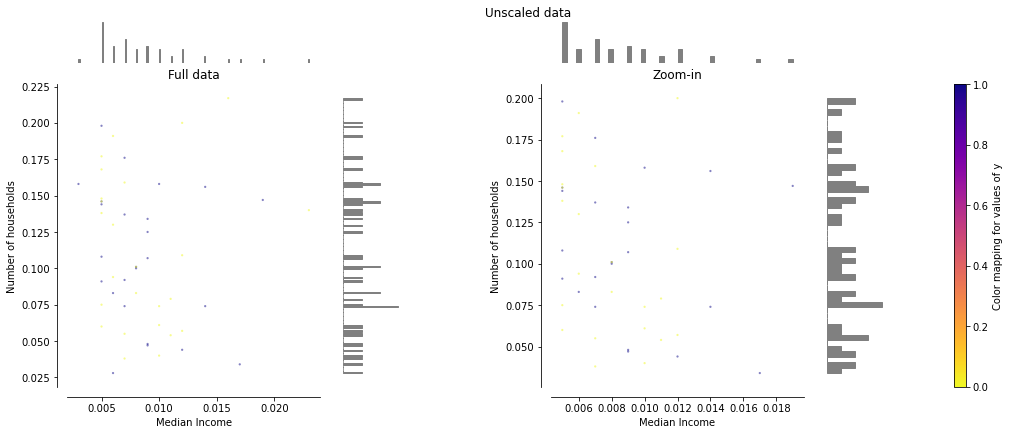

In [29]:
make_plot(0)

# StandardScaler

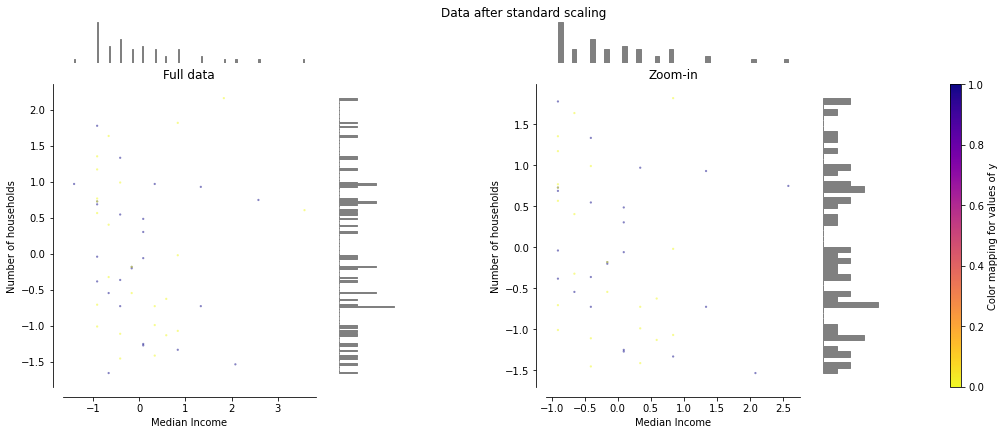

In [30]:
make_plot(1)

# MinMaxScaler

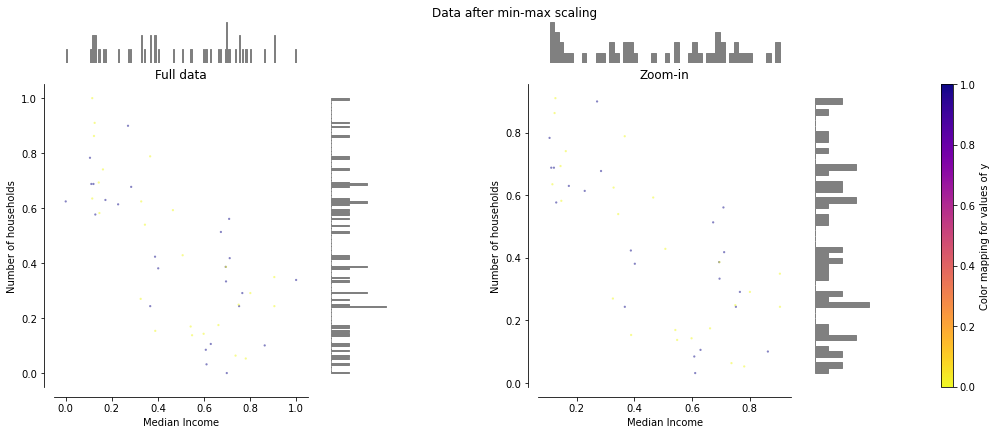

In [22]:
make_plot(2)

MaxAbsScaler

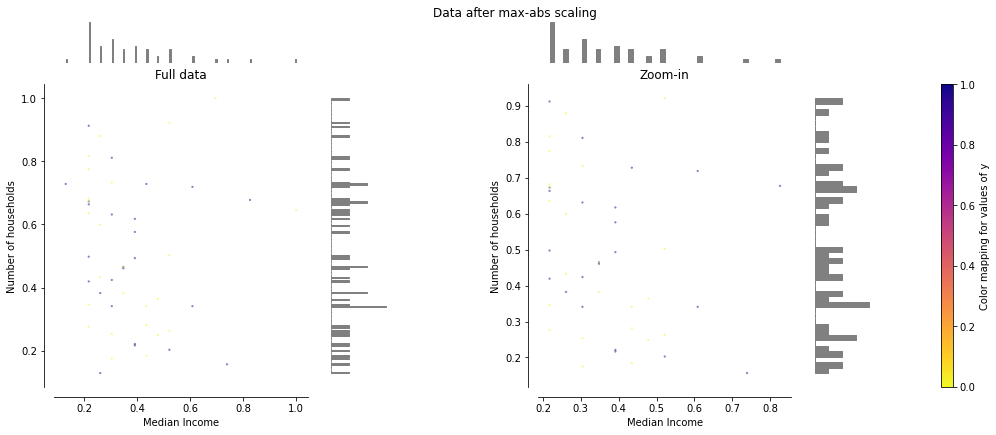

In [31]:
make_plot(3)

# RobustScaler

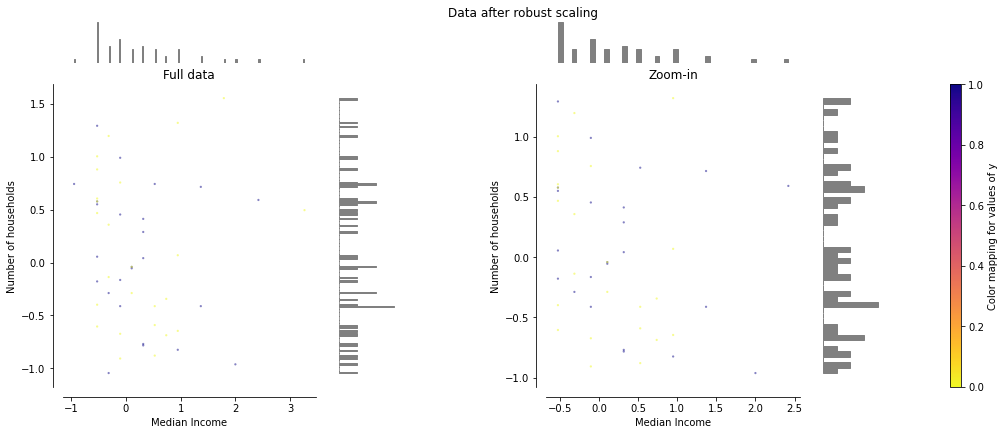

In [32]:
make_plot(4)

In [ ]:
PowerTransformer

In [ ]:
QuantileTransformer (uniform output)

In [ ]:
QuantileTransformer (Gaussian output)

In [ ]:
Normalizer